<a href="https://colab.research.google.com/github/Cyfraice/ML/blob/main/Deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/c/dogs-vs-cats/data

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import tensorflow as tf

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import InputLayer, Input, Conv2D
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.models import Model
from tensorflow.keras.backend import clear_session
from sklearn.metrics import classification_report

In [ ]:
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog',\
          'frog','horse', 'ship', 'truck']

170498071/170498071 [==============================] - 6s 0us/step
(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [ ]:
for dataset in [y_train, y_test]:
  for i in range(dataset.shape[0]):
    if labels[dataset[i][0]] in ['airplane', 'automobile', 'ship', 'truck']:
      dataset[i][0] = 1
    else:
      dataset[i][0] = 0

Text(0.5, 1.0, '0')

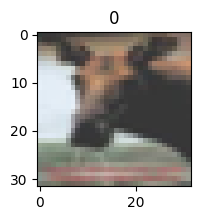

In [ ]:
plt.figure(figsize=(2,2))
indx = np.random.choice(range(50000))
plt.imshow(x_train[indx])
plt.title(y_train[indx][0])

In [ ]:
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()

In [ ]:
cnn = Sequential([
    InputLayer(input_shape = (32, 32, 3)),
    Conv2D(32, (3, 3), activation = 'relu', padding = 'same'),
    Conv2D(32, (3, 3), activation = 'relu', padding = 'same'),
    MaxPool2D(),

    Conv2D(32, (3, 3), activation = 'relu', padding = 'same'),
    Conv2D(32, (3, 3), activation = 'relu', padding = 'same'),
    MaxPool2D(),

    Conv2D(32, (3, 3), activation = 'relu', padding = 'same'),
    Conv2D(32, (3, 3), activation = 'relu', padding = 'same'),
    MaxPool2D(),

    Flatten(),
    Dense(1024, activation='relu'),
    Dense(2, activation='softmax')

])

In [ ]:
cnn.compile(optimizer = 'adam',
            loss = 'sparse_categorical_crossentropy',
            metrics = ['accuracy'])

In [ ]:
hist1 = cnn.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5)

Epoch 1/5
1563/1563 [==============================] - 21s 9ms/step - loss: 0.2755 - accuracy: 0.8852 - val_loss: 0.2300 - val_accuracy: 0.9059
Epoch 2/5
1563/1563 [==============================] - 10s 6ms/step - loss: 0.1971 - accuracy: 0.9223 - val_loss: 0.1750 - val_accuracy: 0.9279
Epoch 3/5
1563/1563 [==============================] - 10s 6ms/step - loss: 0.1756 - accuracy: 0.9313 - val_loss: 0.1713 - val_accuracy: 0.9319
Epoch 4/5
1563/1563 [==============================] - 10s 7ms/step - loss: 0.1555 - accuracy: 0.9392 - val_loss: 0.1645 - val_accuracy: 0.9338
Epoch 5/5
1563/1563 [==============================] - 11s 7ms/step - loss: 0.1429 - accuracy: 0.9444 - val_loss: 0.1468 - val_accuracy: 0.9435


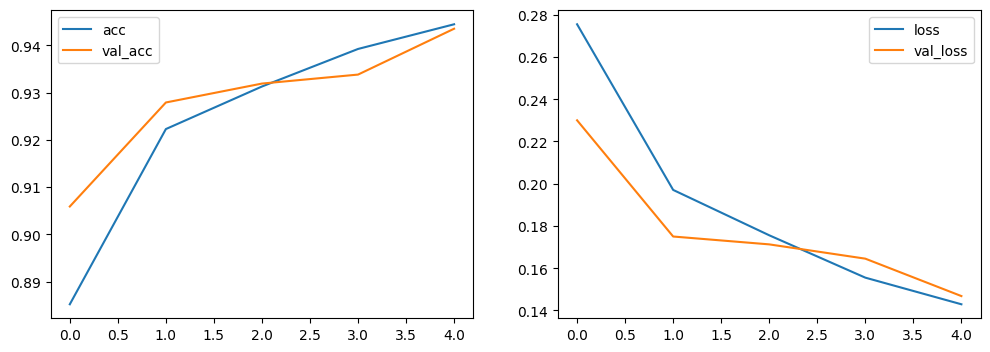

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(hist1.history['accuracy'], label='acc')
plt.plot(hist1.history['val_accuracy'], label='val_acc')
plt.legend()
plt.subplot(1,2,2)
plt.plot(hist1.history['loss'], label='loss')
plt.plot(hist1.history['val_loss'], label='val_loss')
plt.legend()

In [ ]:
y_pred = np.argmax(cnn.predict(x_test, verbose=False), axis = 1)
y_pred

array([0, 1, 1, ..., 0, 1, 0])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      6000
           1       0.92      0.94      0.93      4000

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000



1


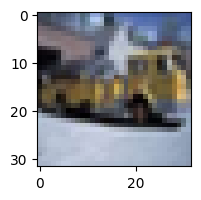

In [ ]:
plt.figure(figsize=(2,2))
indx = np.random.choice(range(x_test.shape[0]))
print(np.argmax(cnn.predict(x_test[indx:indx + 1, :], verbose=False).reshape(-1)))
plt.imshow(x_test[indx])
